<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/HW7/NLP_moviereviews_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import json
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [ ]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [ ]:
!mkdir sentimentanal

In [ ]:
cd sentimentanal/

/content/drive/MyDrive/sentimentanal


In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 74.6MB/s]


In [ ]:
ls *

sentiment-analysis-on-movie-reviews.zip


In [ ]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [ ]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
reviews = reviews.groupby("SentenceId").first()
reviews.head()

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1


In [ ]:
reviews.shape

(8529, 3)

In [ ]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [ ]:
import numpy as np
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(d.split()) 
              for d in reviews["Phrase"].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [ ]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

(array([1072., 2200., 1655., 2321., 1281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

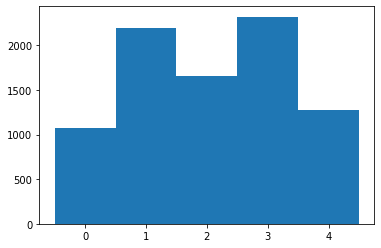

In [ ]:
import pylab as plt
plt.hist(reviews["Sentiment"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

In [ ]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=be6f4fc4cf32e332a6d9fe8b2e665475f5b8dc5c42eec818fa95d8cde8a0a68b
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#NLP packs
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from textblob import TextBlob , Word
import re 
import string

In [ ]:
from nltk.tokenize import word_tokenize


LookupError: ignored

In [ ]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace('[^\w\s]', '').str.replace('\d+',
                    '').str.replace('\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x : 
                  word_tokenize(x.lower())) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if word not in STOPWORDS]) # stop words cikarma


In [ ]:
import seaborn as sns

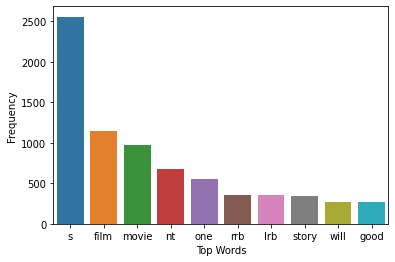

In [ ]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
sns.barplot(x="Top Words",y="Frequency",data=words_freq)


In [ ]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if word not in 
                   ["s", "nt", "rrb", "lrb", "one"]]) # stop words cikarma


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

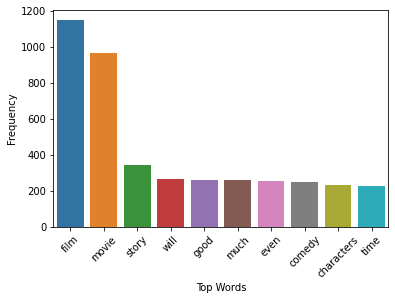

In [ ]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


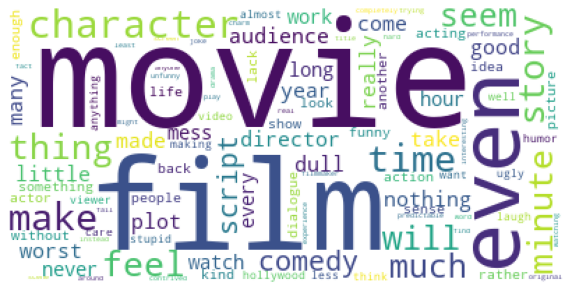

In [ ]:
import pylab as plt
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")
wc(reviews[reviews.Sentiment==0.0].Phrase.sum(), 'white')


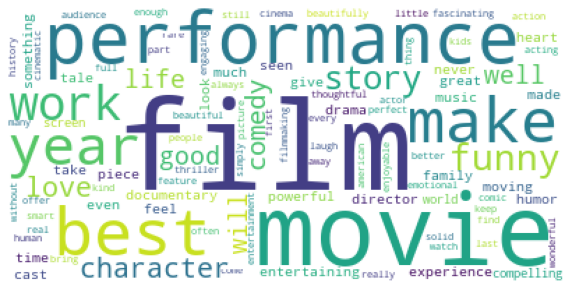

In [ ]:
wc(reviews[reviews.Sentiment==4.0].Phrase.sum(), 'white')


In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.7 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [ ]:

#import the library

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores(' '.join(reviews.Phrase[3]))
print(sentiment_dict['compound'])


-0.3818


In [ ]:
reviews.Sentiment[3]

1

In [ ]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


In [ ]:
for i in reviews.index[:10]:
  print(sentiment_vader(reviews.Phrase[i]), reviews.Sentiment[i])

0.8024 1
0.5859 4
-0.3818 1
-0.886 3
-0.128 1
-0.34 4
-0.6369 1
0.7783 3
-0.0516 1
-0.5719 1


In [ ]:
y = [sentiment_vader(reviews.Phrase[i]) for i in reviews.index]

In [ ]:
reviews[reviews.Sentiment == 0].Sentiment.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = np.array(y)

Text(0, 0.5, 'Prediction')

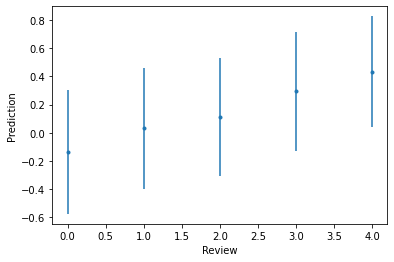

In [ ]:
plt.errorbar(range(5), 
             [y[reviews.Sentiment == i].mean() for i in range(5)],
             yerr = [y[reviews.Sentiment == i].std() for i in range(5)],
             fmt='.')
plt.xlabel("Review")
plt.ylabel("Prediction")

In [ ]:
[y[reviews.Sentiment == i].mean() for i in range(5)]

[1.7267072761194031,
 2.0618946363636366,
 2.2277579456193353,
 2.5902122361051276,
 2.8692282591725213]